In [1]:
import scanpy as sc
import sys
sys.path.append('/wsfish/glioblastoma/')
import FISHspace as sp

%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['pdf.fonttype'] = 42

# save figure with no pad
mpl.rcParams['savefig.pad_inches'] = 0
mpl.rcParams['savefig.bbox'] = 'tight'

# set axes width
mpl.rcParams['axes.linewidth'] = 0.2
mpl.rcParams['xtick.minor.pad'] = 0
mpl.rcParams['xtick.major.pad'] = 0
mpl.rcParams['ytick.minor.pad'] = 0
mpl.rcParams['ytick.major.pad'] = 0
mpl.rcParams['xtick.minor.width'] = 0.2
mpl.rcParams['xtick.major.width'] = 0.2
mpl.rcParams['ytick.minor.width'] = 0.2
mpl.rcParams['ytick.major.width'] = 0.2



In [3]:
adata = sc.read_h5ad('../GBM_Linnarsson_EEL.h5ad')

In [5]:
import pandas as pd

In [6]:
rename_dic = {
    'GW-like 5':'GW-like Endo.Ass.',
    'GW-like 2':'GW-like Periphery1',
    'GW-like 3':'GW-like Periphery2',
    'GW-like 1':'GW-like Periphery3',
    
    'GW-like 6':'GW-like HYP2',
    'GW-like 8':'GW-like HYP1',
    'GW-like 7':'GW-like OPC',
    'GW-like 4':'GW-like nIPC',
    
    'nIPC-RG-like':'RG-like',
    
 
}

adata.obs['m-states3'] = pd.Categorical([rename_dic[m] if m in rename_dic else m for m in adata.obs['m-states']])
adata.obs['m-states3'] = pd.Categorical(['Endothelial' if m.count('Endothelial') else m for m in adata.obs['m-states3']])

In [7]:
palette = {
    'GW-like Endo.Ass.':'#2d55ff', 
    'GW-like Periphery1':'#93faa5', 
    'GW-like Periphery2':'#68c3a3', 
    'GW-like Periphery3':'#d5b8ff', 
    'GW-like HYPR1':'#e33d94', 
    'GW-like HYPR2': '#c44d56', 
    'GW-like OPC':'#ff9470', 
    'GW-like nIPC': '#f3e16b',
}

palette_common = {
  
    'GW-like Endo.Ass.':'#CFA8D1', 
    'GW-like Periphery1':'#EDE8F3',
    'GW-like Periphery2':'#E2D8EA',
    'GW-like Periphery3':'#D6BEDD', 
    'GW-like HYP1':'#C50F53', 
    'GW-like HYP2': '#840034', 
    'GW-like OPC':'#A40447', 
    'GW-like nIPC': '#e43c96',
    
    'Endothelial':'#C8E683', # '#d5b8ff',  
    'Mural': '#C8E683',
}   

In [8]:
palette_common.keys()

dict_keys(['GW-like Endo.Ass.', 'GW-like Periphery1', 'GW-like Periphery2', 'GW-like Periphery3', 'GW-like HYP1', 'GW-like HYP2', 'GW-like OPC', 'GW-like nIPC', 'Endothelial', 'Mural'])

INFO:root:First filter, 85582 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 10008 cells left
/wsfish/glioblastoma/FISHspace/plotting/polygons.py:138: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  _ = gdf[gdf[cluster_key].isin(grey_clusters)].plot(


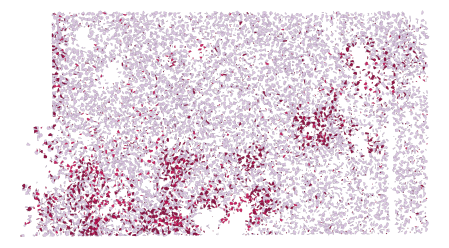

In [13]:
sp.pl.plot_polygons(
    adata,
    sample='SL002',
    cluster_key='m-states3',
    clusters=['GW-like Periphery3','GW-like HYP2', 'GW-like HYP1'], #[45,76],
    alpha=0.9,
    show_axis=False,
    show_scalebar=False,
    palette= palette_common,
    figsize=(5,5),
    save=True,
    savepath='figures/SL002.svg',
    xlim=(0,5000),
    ylim=(0,6000),
)

#plt.savefig('figures/SL002.svg',dpi=300, format='svg', transparent=True,bbox_inches='tight')

INFO:root:First filter, 156221 cells left
INFO:root:Zoom filter, 156221 cells left
/wsfish/glioblastoma/FISHspace/plotting/polygons.py:138: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  _ = gdf[gdf[cluster_key].isin(grey_clusters)].plot(


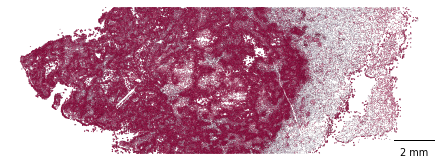

In [14]:
sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='m-states3',
    clusters=['GW-like Periphery3','GW-like HYP2', 'GW-like HYP1',], #[45,76],
    alpha=0.9,
    show_axis=False,
    show_scalebar=True,
    palette= palette_common,
    figsize=(5,5),
    save=True,
    savepath='figures/SL035B.svg',

)

#plt.savefig('figures/SL002.svg',dpi=300, format='svg', transparent=True,bbox_inches='tight')

In [15]:
import numpy as np
WR = adata[adata.obs['m-states3'].isin(['GW-like Endo.Ass.', 'GW-like Periphery1', 'GW-like Periphery2', 'GW-like Periphery3', 'GW-like HYP1', 'GW-like HYP2', 'GW-like OPC', 'GW-like nIPC', 'Endothelial', 'Mural'])]

In [16]:
print('s')

s


In [ ]:
xlim = (11200, 12200)
ylim= (5500, 6500)

fig,ax = plt.subplots(1,1 ,figsize=(5,5))
gene = 'MGP'
sp.pl.plot_polygons_expression(
    WR,
    sample='SL035B',
    genes=[gene],
    cmap='Reds',
    xlim=xlim,
    ylim=ylim,
    alpha=1,
    show_axis=False,
    #figsize=(5,5),
    mquant=0.995,
    vmin=0,
    vmax=np.quantile(WR[:,gene], .99),
    ax = ax

)

sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='m-states',
    clusters=['Mural','Endothelial'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=0.9,
    show_axis=True,
    palette= {'Endothelial':'#C8E683','Mural': '#C8E683',},
    ax=ax,
)

plt.savefig('figures/MGP.svg',dpi=300, format='svg', transparent=True,bbox_inches='tight')

In [19]:
vmax=np.quantile(WR[:,gene].X.toarray(), .99)

INFO:root:First filter, 206089 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 2418 cells left
INFO:root:First filter, 206089 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 2418 cells left
INFO:root:First filter, 4220 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 67 cells left
/wsfish/glioblastoma/FISHspace/plotting/polygons.py:138: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  _ = gdf[gdf[cluster_key].isin(grey_clusters)].plot(
/wsfish/glioblastoma/FISHspace/plotting/polygons.py:163: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  im = gdf_.plot(color= palette[c], edgecolor='black',linewidth=linewidth, ax=ax1,rasterized=True,facecolor=facecolor,alpha=alpha)


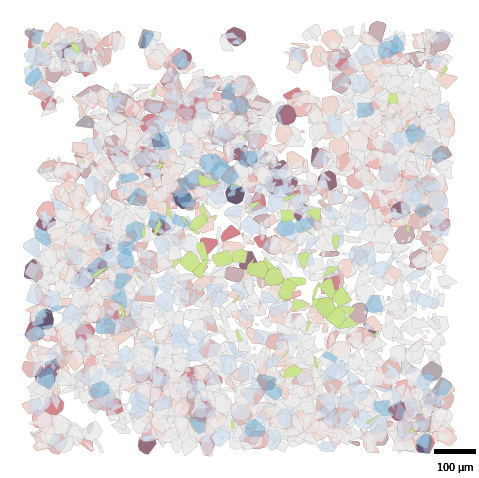

In [23]:
xlim = (11200, 12200)
ylim= (5500, 6500)

fig,ax = plt.subplots(1,1 ,figsize=(5,5))
gene = 'SERPINE1'
vmax=np.quantile(WR[:,gene].X.toarray(), .99)
sp.pl.plot_polygons_expression(
    WR,
    sample='SL035B',
    cluster_key='m-states3',
    genes=[gene],
    cmap='Reds',
    xlim=xlim,
    ylim=ylim,
    alpha=1,
    show_axis=False,
    #figsize=(5,5),
    mquant=0.9999,
    vmin=0,
    vmax=vmax,
    ax = ax

)

gene = 'PLAU'
vmax=np.quantile(WR[:,gene].X.toarray(), .9999)
sp.pl.plot_polygons_expression(
    WR,
    sample='SL035B',
    cluster_key='m-states3',
    genes=[gene],
    cmap='Blues',
    xlim=xlim,
    ylim=ylim,
    alpha=.5,
    show_axis=False,
    #figsize=(5,5),
    mquant=0.995,
    vmin=0,
    vmax=vmax,
    ax = ax

)

sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='m-states3',
    clusters=['Mural','Endothelial'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=0.9,
    show_axis=True,
    palette= {'Endothelial':'#C8E683','Mural': '#C8E683',},
    ax=ax,
)

plt.savefig('figures/SERPINE1_PLAU.svg',dpi=300, format='svg', transparent=True,bbox_inches='tight')

In [ ]:
xlim = (11200, 12200)
ylim= (5500, 6500)

fig,ax = plt.subplots(1,1 ,figsize=(5,5))
gene = 'MGP'
sp.pl.plot_polygons_expression(
    WR,
    sample='SL035B',
    genes=[gene],
    cmap='Reds',
    xlim=xlim,
    ylim=ylim,
    alpha=1,
    show_axis=False,
    #figsize=(5,5),
    mquant=0.995,
    vmin=0,
    vmax=np.quantile(WR[:,gene], .99),
    ax = ax

)

sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='m-states',
    clusters=['Mural','Endothelial'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=0.9,
    show_axis=True,
    palette= {'Endothelial':'#C8E683','Mural': '#C8E683',},
    ax=ax,
)

plt.savefig('figures/MGP.svg',dpi=300, format='svg', transparent=True,bbox_inches='tight')

In [ ]:
xlim = (11200, 12200)
ylim= (5500, 6500)

fig,ax = plt.subplots(1,1 ,figsize=(5,5))

sp.pl.plot_polygons_expression(
    GW,
    sample='SL035B',
    genes=['PLAU'],
    cmap='Reds',
    xlim=xlim,
    ylim=ylim,
    alpha=1,
    show_axis=False,

    mquant=0.99,
    ax = ax

)

sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='m-states',
    clusters=['Mural','Endothelial'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=0.9,
    show_axis=True,
    palette= {'Endothelial':'#8c14fc',  'Mural': '#8c14fc'},
    ax=ax,
)

plt.show()